# Variáveis Aleatórias Contínuas e Discretas
---
## Teórico:

* **Definição** : uma variável aleatória é uma variável quantitativa (pode ser mensurada numericamente), onde o resultado e/ou valor depende de fatores aleatórios. Um exemplo pode ser um dado, apesar de sabermos os possíveis resultados (1 a 6) não conseguimos dizer qual será o resultado em sí uma vez que o lançamos, podemos apenas dizer a probabilidade de um número sair, mas não qual número irá ser após o jogarmos. Ou seja, variáveis aleatórias em estatítica são definidas como fenômenos incertos e são a base para estudos futuros. Essas variáveis podem ser divididas em: 
    * Variáveis Discretas: é o valor dentro de um conjunto enumerável de pontos, ou seja, um valor definido dentro de um conjunto informado. 
    * Variáveis Contínuas: é o valor dentro de um conjunto de números reais, ou seja, um valor qualquer dentro de um conjunto informado.
    * Variáveis Mistas: é a junção das variáveis discretas e contínuas, ou seja, quando usamos as duas em dada situação e assim obtendo um mista.

* **Fórmula**:<p>$ X:\Omega \rightarrow \mathbb{R} \Leftrightarrow \{\omega : X(\omega) \leq x\} \in \sigma-álgebra, \forall x \in \mathbb{R}$</p><p>A função **X** de $\Omega$ em $\mathsf{\mathbb{R}}$ será uma variável aleatória (ou uma função mensurável) se e somente se, para todo valor **$x$**$\in \mathbb{R}$, o conjunto de elementos $\omega$, tais que o valor de função **X** nos elementos **$X(\omega)$** seja menor ou igual a **$x$**, pertencer ao $\sigma-álgebra$</p>

# Prática:
* Exemplos com python: os exemplos serão realizados na variáveis discretas e contínuas
---
* Discretas: vamos analisar o jogo de dois dados de 6 lados (1 a 6) e análisar qual o número (soma dois dois valores dos dados após jogados) que possui a maior chance de cair. Primeiramente vamos analisar essa chance e depois realizar o teste em python.
    * Análise: vamos considerar dois dados $n_1$ e $n_2$ de {1, 2, 3, 4, 5, 6} como o espaço amostral e o número total de lançamentos (a soma dos números de cada conjunto) como a variável aleatória **$X$** dada pela função que mapeia o conjunto a soma **$X((n_1, n_2)) = n_1 + n_2$** e tem a função massa de probabilidade **$fx$** dada por $$fx(x)=\frac{min(x-1, 13-x)}{36}, para x \in \{ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}.$$Portanto de analisarmos os lançamentos podemos notar que o número 7 é o que terá a maior probabilidade de se obter, como a imagem abaixo ilustra:<p>![img]( https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Dice_Distribution_%28bar%29.svg/220px-Dice_Distribution_%28bar%29.svg.png)</p>
    * Agora utilizando a biblioteca <code>random</code> do python vamos criar um algoritmo que simule o jogo de dois dados e armazene os resultados para verificarmos qual o resultado que mais saiu:

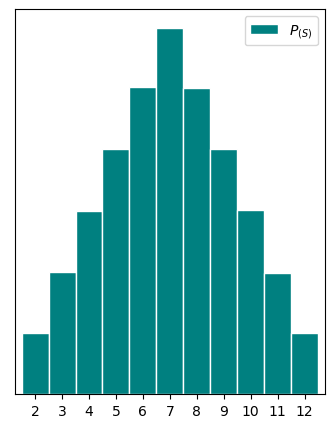

In [33]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dado(n):
    """Jogar dois dados
    __________
    Parametros:
    :param n: int, número de jogadas
    __________
    Retorna: rodadas, uma lista do valor da jogada iterado sobre o número n de jogadas
    """
    rodadas = []
    for i in range(n):
        dois_dados = random.randint(1, 6) + random.randint(1, 6)
        rodadas.append(dois_dados)
    return rodadas
# Criando um df para armazenar as jogadas usando a função value_counts() para somar quantas vezes cada número saiu e nomeando a coluna como P(s)
df = pd.DataFrame(pd.DataFrame(dado(1000000)).value_counts(), columns = ['$P_{(S)}$'])

# Formatando o df para criar duas colunas uma sendo o número que saiu S e outra a quantia de vezes que o número apareceu P(s)
df = df.reset_index().rename(columns = {0:'S'})

#Organizando a tabela para plotar
df.sort_values('S').plot(x = 'S', y = '$P_{(S)}$', kind = 'bar', figsize = (4, 5), color = "teal", edgecolor = 'white', width = 1)
plt.yticks([])
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

* Podemos notar que a regra se aplica, pois rodamos o algoritmo **Um milhão de vezes** e podemos notar que o número 7 foi o que mais apareceu
---
## Contínuas: um pouco mais difícil para demostrar como a discreta, por ser um pouco mais matemático e menos visual.
* Entretanto dentro das aplicações financeiras são as que usamos para sua classificação, pois em uma aplicação financeira tempos um intervalo definido como vimos acima no caso dos dados, contudo não podemos determinar o valor simplesmente como sendo pertencentes ao conjunto [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] como demostrado acima, pois no mercado financeiro a quantia de valores pode ser considerado infinito dentro de um intervalo, pois temos uma grande variedade de variáveis sobre ele. Outro exemplo seria o de definir o peso de um homem adulto, podemos considerar um intervalor de **30Kg** até **200Kg**, somente para critério de exemplificação, e quando pesamos o homem verificamos que ele tem **83.5Kg**, entretanto se usarmos uma balança com uma precisão ainda maior verificamos que seu peso é de **83.500001Kg**, portanto se seguirmos essa lógica o seu pesso pode ainda ser diferente se utilizarmos uma balança cada vez mais precisa, e isso é definido como uma variável aleatória contínua.

